In [1]:
from typing import Union
import os
import random
from matplotlib import pyplot as plt
from einops import rearrange
import PIL
from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms import Grayscale
from torchvision.transforms.functional import to_pil_image
import torch
from src.dataset.vitonhd import VITONHDDataset
from src.utils import get_project_root

PROJECT_ROOT_PATH = get_project_root()

/home/hosjiu/workspace/heatmob/vto-engine/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
data_path = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd')
dataset = VITONHDDataset(data_path, use_trainset=False)
len(dataset)

2032

In [14]:
assert len(dataset.im_paths) == len(dataset.m_paths)
mismatch = 0
mismatch_fnames = []
for img_path, mask_path in zip(dataset.im_paths, dataset.m_paths):
    img_fname = str(img_path).split('/')[-1].split('.')[0][:5]
    mask_fname = str(mask_path).split('/')[-1].split('.')[0][:5]
    if img_fname != mask_fname:
        mismatch += 1
        mismatch_fnames.append([img_fname, mask_fname])
print(f'# of files: {len(dataset)}')
print(f'# of mismatch files: {mismatch}')
print(mismatch_fnames)

# of files: 2032
# of mismatch files: 2032
[['01143', '14531'], ['14112', '01711'], ['00158', '05373'], ['04393', '02425'], ['13606', '01641'], ['13620', '08563'], ['00055', '13933'], ['09725', '07941'], ['02682', '06117'], ['02196', '07479'], ['09807', '06502'], ['07421', '02030'], ['10513', '07414'], ['06835', '10070'], ['02996', '10852'], ['10177', '11836'], ['12982', '00055'], ['07280', '02184'], ['12318', '10513'], ['06570', '07845'], ['00349', '02771'], ['01428', '14296'], ['07111', '11738'], ['02518', '05682'], ['08900', '09933'], ['12875', '00400'], ['01796', '05792'], ['08973', '08381'], ['14571', '00984'], ['08853', '09845'], ['07407', '01463'], ['09498', '06683'], ['04912', '02824'], ['09802', '03719'], ['01767', '00260'], ['02786', '06444'], ['00273', '03067'], ['07926', '00911'], ['09864', '03712'], ['11122', '04630'], ['00790', '03697'], ['05186', '10494'], ['07409', '14009'], ['14533', '12781'], ['03579', '08877'], ['02297', '11161'], ['04432', '09577'], ['07209', '04313

In [ ]:
path = '/home/hosjiu/workspace/heatmob/vto-engine/datasets/vitonhd/test/agnostic-mask/'
os.listdir()

['14531_00_mask.png',
 '01711_00_mask.png',
 '05373_00_mask.png',
 '02425_00_mask.png',
 '01641_00_mask.png',
 '08563_00_mask.png',
 '13933_00_mask.png',
 '07941_00_mask.png',
 '06117_00_mask.png',
 '07479_00_mask.png',
 '06502_00_mask.png',
 '02030_00_mask.png',
 '07414_00_mask.png',
 '10070_00_mask.png',
 '10852_00_mask.png',
 '11836_00_mask.png',
 '00055_00_mask.png',
 '02184_00_mask.png',
 '10513_00_mask.png',
 '07845_00_mask.png',
 '02771_00_mask.png',
 '14296_00_mask.png',
 '11738_00_mask.png',
 '05682_00_mask.png',
 '09933_00_mask.png',
 '00400_00_mask.png',
 '05792_00_mask.png',
 '08381_00_mask.png',
 '00984_00_mask.png',
 '09845_00_mask.png',
 '01463_00_mask.png',
 '06683_00_mask.png',
 '02824_00_mask.png',
 '03719_00_mask.png',
 '00260_00_mask.png',
 '06444_00_mask.png',
 '03067_00_mask.png',
 '00911_00_mask.png',
 '03712_00_mask.png',
 '04630_00_mask.png',
 '03697_00_mask.png',
 '10494_00_mask.png',
 '14009_00_mask.png',
 '12781_00_mask.png',
 '08877_00_mask.png',
 '11161_00

In [5]:
path = '/home/hosjiu/workspace/heatmob/vto-engine/datasets/vitonhd/train/image/04274_00.jpg'
path.split('/')[-1].split('.')[0]

'04274_00'

In [4]:
dataset_len = len(dataset)
rand_idx = random.randint(0, dataset_len - 1)
rand_sample = dataset[rand_idx]

In [5]:
rand_sample['original_image_path']

'/home/hosjiu/workspace/heatmob/vto-engine/datasets/vitonhd/train/image/01101_00.jpg'

In [6]:
rand_sample.keys()

dict_keys(['original_image', 'original_image_path', 'original_mask', 'original_masked_image', 'original_densepose', 'image', 'masked_image', 'mask', 'densepose', 'cloth_raw', 'cloth', 'im_name'])

In [7]:
def show(img: Union[torch.Tensor, PIL.Image.Image], print_shape: bool = False):
    if isinstance(img, PIL.Image.Image):
        img = pil_to_tensor(img)

    if img.ndim == 3:
        img = rearrange(img, 'c h w -> h w c')
    else:
        raise ValueError('Only support for RGB image for now.')

    if print_shape:
        print(img.shape)

    plt.imshow(img)

In [8]:
rand_sample['im_name']

'01101_00.jpg'

torch.Size([1024, 768, 3])


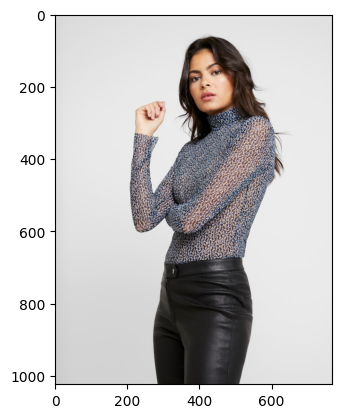

In [9]:
show(rand_sample['original_image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


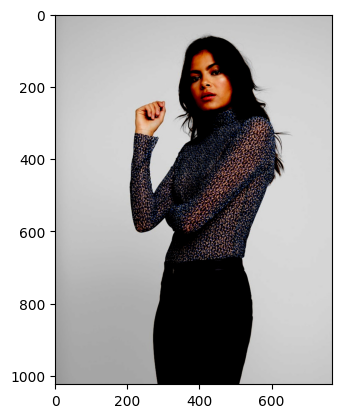

In [10]:
show(rand_sample['image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


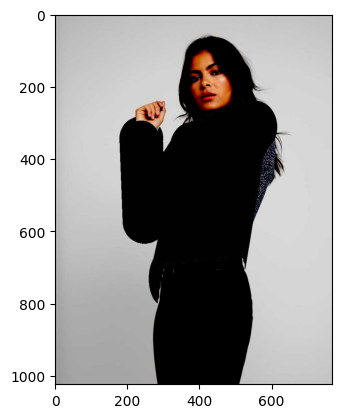

In [11]:
show(rand_sample['masked_image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


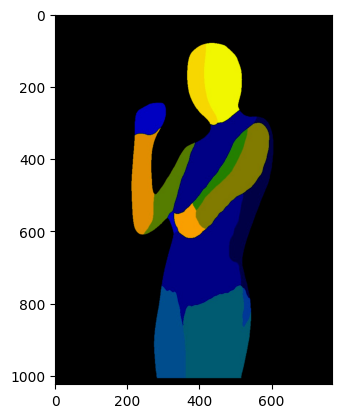

In [12]:
show(rand_sample['densepose'], print_shape=True)

torch.Size([1024, 768, 1])


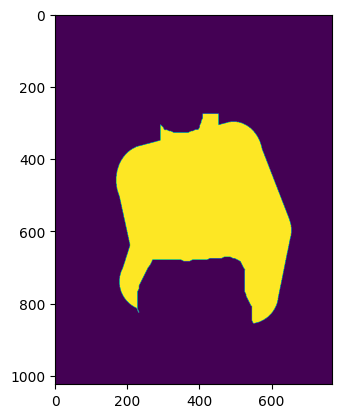

In [13]:
# This image is actually binary image but
# we converted it from PIL Image to Pytorch Tensor
# so the color space is not white-black one
show(rand_sample['mask'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


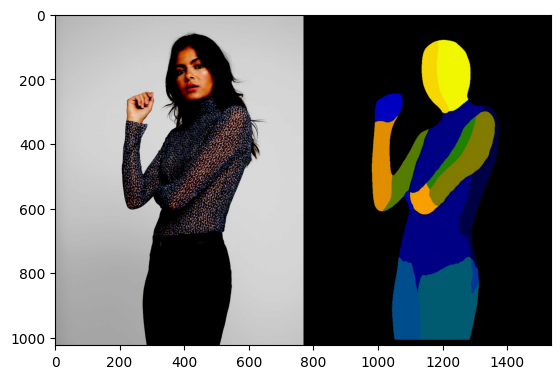

In [14]:
show(torch.cat([rand_sample['image'], rand_sample['densepose']], dim=-1))

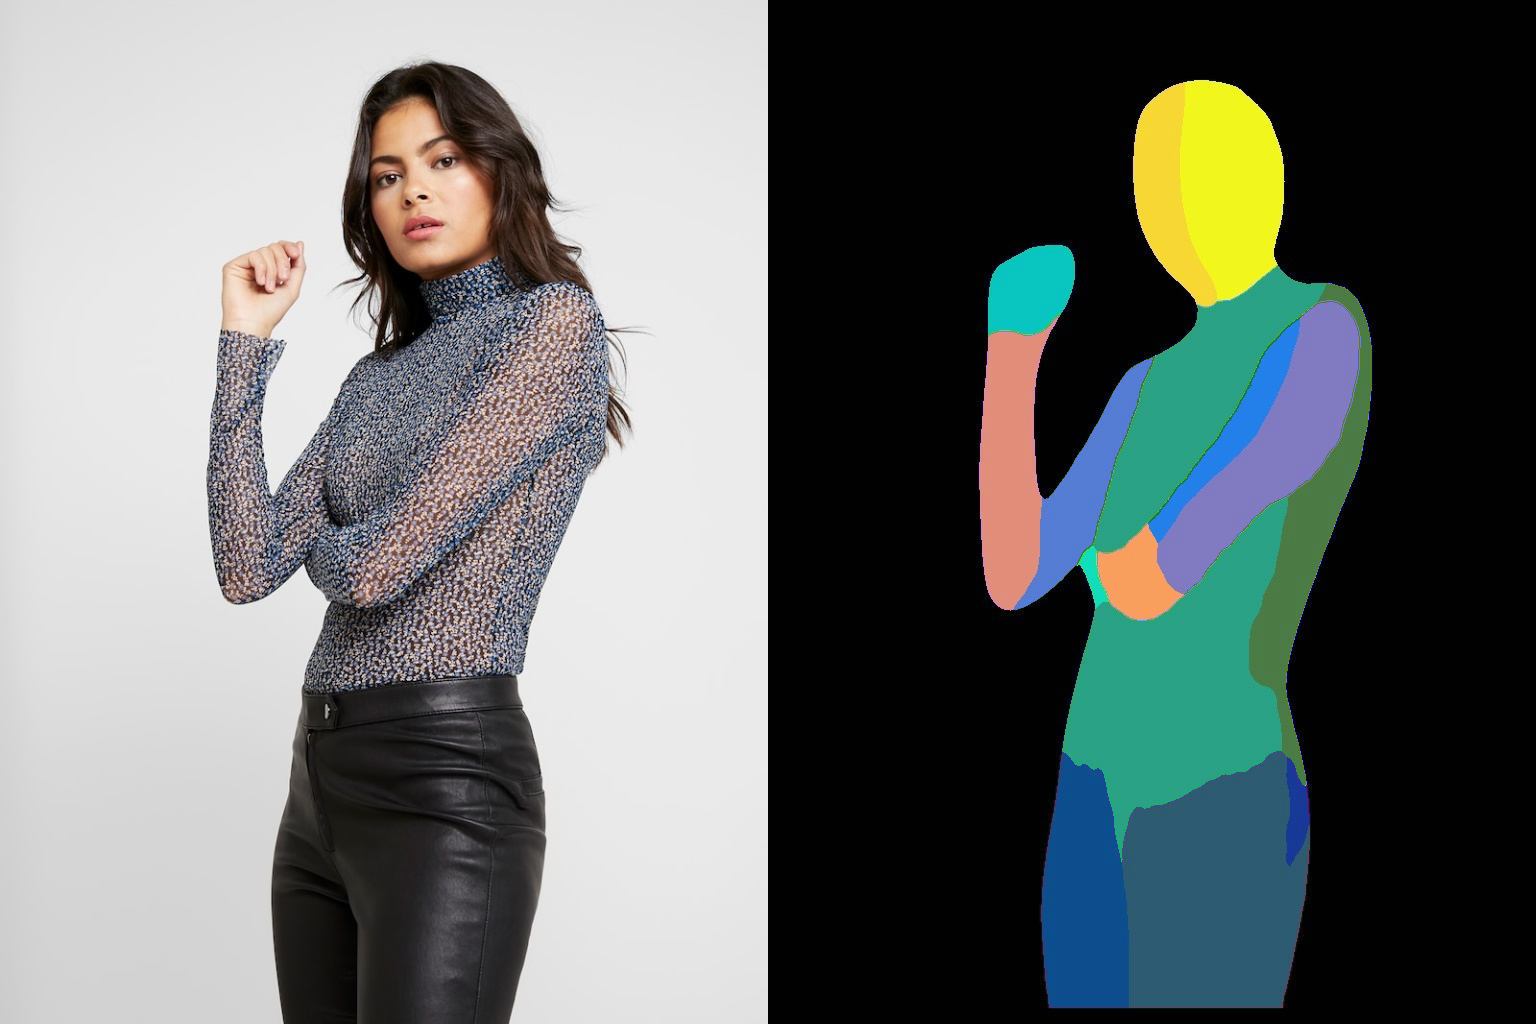

In [15]:
origin_img = to_pil_image(rand_sample['original_image'])
dense_img = to_pil_image(rand_sample['densepose'])
new_img = PIL.Image.new('RGB', (origin_img.width * 2, origin_img.height))
new_img.paste(origin_img, (0, 0))
new_img.paste(dense_img, (origin_img.width, 00))
new_img

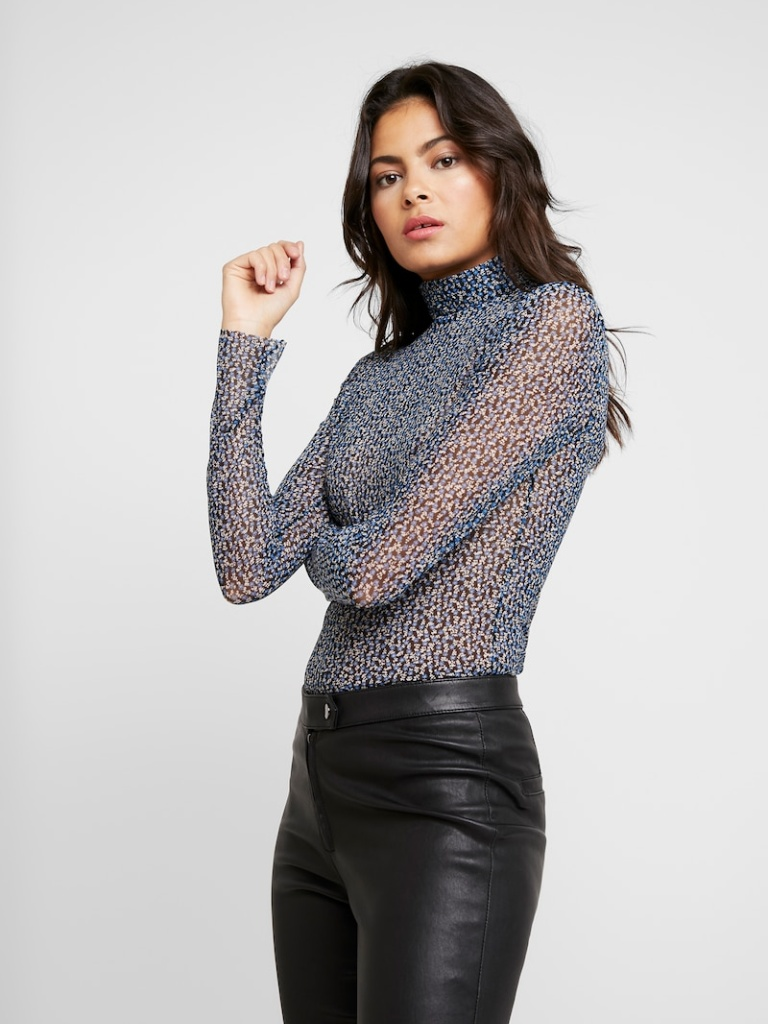

In [16]:
new_img.crop((0, 0, new_img.width // 2, new_img.height))